<a href="https://colab.research.google.com/github/gkr0828/gkr0828/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_10%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
warnings.filterwarnings(action='ignore')

#4-2-1. 데이터 불러오기

In [ ]:
# Naver sentiment movie corpus v1.0 데이터 불러오기
train_file = tf.keras.utils.get_file(
    'ratings_train.txt', origin='https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt', extract=True)

train = pd.read_csv(train_file, sep='\t')
     

##4-2-2. EDA (탐색적 데이터 분석)

In [ ]:
# 데이터 크기 및 샘플 확인
print("train shape: ", train.shape)
train.head()
     

train shape:  (150000, 3)


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
# 레이블별 개수
cnt = train['label'].value_counts()
print(cnt)
# 0 > 부정, 1 > 긍정
#레이블  갯수

0    75173
1    74827
Name: label, dtype: int64


<Axes: xlabel='label', ylabel='count'>

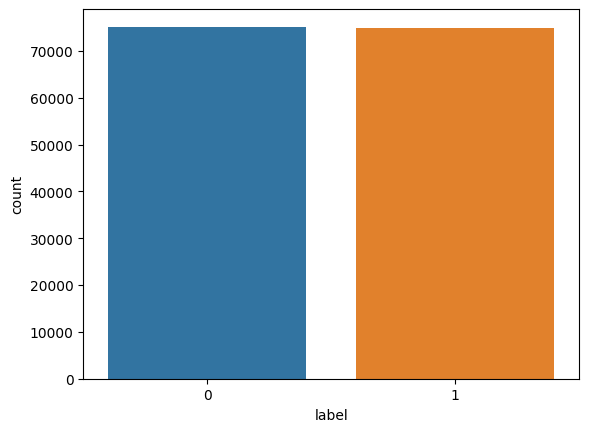

In [ ]:
# 레이블별 비율 
sns.countplot(x='label',data=train)


In [ ]:
# 결측치 확인
train.isnull().sum()
#Nan : 결측치,null  

id          0
document    5
label       0
dtype: int64

In [ ]:
# 결측치(의견없음)가 특정 label값만 있는지 확인
train[train['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


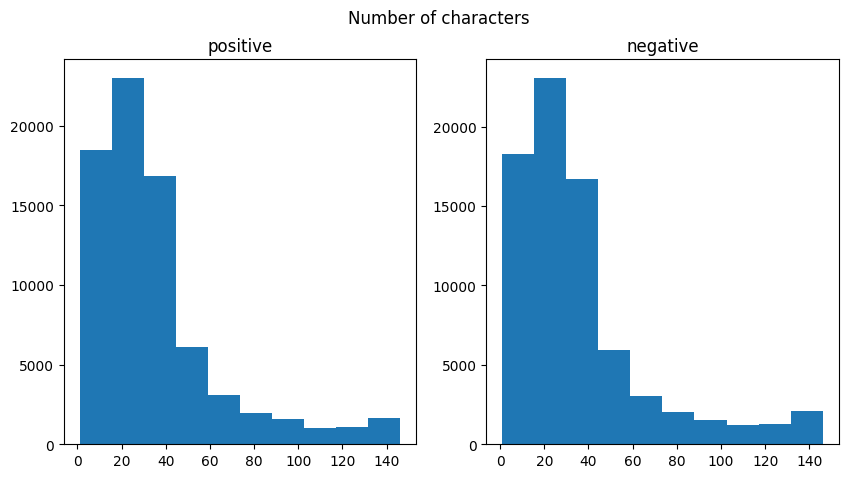

In [ ]:
# 레이블 별 텍스트 길이
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
data_len=train[train['label']==1]['document'].str.len()
ax1.hist(data_len)
ax1.set_title('positive')

data_len=train[train['label']==0]['document'].str.len()
ax2.hist(data_len)
ax2.set_title('negative')
fig.suptitle('Number of characters')
plt.show()

##4-2-3 형태소 불러오기


In [ ]:
# Mecab 형태소 설치
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 122 (delta 15), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (122/122), 1.27 MiB | 19.74 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [ ]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [ ]:
! bash install_mecab-ko_on_colab_light_220429.sh

Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 43.6 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-05-10 07:08:26--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22e9:9f55, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-content-disposition=attachment%3B%20filename%3D%22mecab-0.996-ko-0.9.2.tar.gz%22&response-content-encoding=None&AWSAccessKeyId=

In [ ]:
# Kkma, Komoran, Okt, Mecab 형태소
import konlpy
from konlpy.tag import Kkma, Komoran, Okt, Mecab

kkma = Kkma()
komoran = Komoran()
okt = Okt()
mecab = Mecab()

In [ ]:
# 형태소별 샘플
text = "영실아안녕오늘날씨어때?"

def sample_ko_pos(text):
    print(f"==== {text} ====")
    print("kkma:",kkma.pos(text))
    print("komoran:",komoran.pos(text))
    print("okt:",okt.pos(text))
    print("mecab:",mecab.pos(text))
    print("\n")

sample_ko_pos(text)

==== 영실아안녕오늘날씨어때? ====
kkma: [('영', 'MAG'), ('싣', 'VV'), ('아', 'ECD'), ('안녕', 'NNG'), ('오늘날', 'NNG'), ('씨', 'VV'), ('어', 'ECD'), ('때', 'NNG'), ('?', 'SF')]
komoran: [('영', 'NNP'), ('실', 'NNP'), ('아', 'NNP'), ('안녕', 'NNP'), ('오늘날', 'NNP'), ('씨', 'NNB'), ('어떻', 'VA'), ('어', 'EF'), ('?', 'SF')]
okt: [('영', 'Modifier'), ('실아', 'Noun'), ('안녕', 'Noun'), ('오늘날', 'Noun'), ('씨', 'Suffix'), ('어때', 'Adjective'), ('?', 'Punctuation')]
mecab: [('영실', 'NNG'), ('아', 'IC'), ('안녕', 'IC'), ('오늘', 'MAG'), ('날씨', 'NNG'), ('어때', 'VA+EF'), ('?', 'SF')]




In [ ]:
text2 = "영실아안뇽오늘날씨어때?"
sample_ko_pos(text2)

==== 영실아안뇽오늘날씨어때? ====
kkma: [('영', 'MAG'), ('싣', 'VV'), ('아', 'ECD'), ('안', 'MAG'), ('뇽', 'UN'), ('오늘날', 'NNG'), ('씨', 'NNB'), ('어', 'VV'), ('어', 'ECS'), ('때', 'NNG'), ('?', 'SF')]
komoran: [('영실아안뇽오늘날씨어때?', 'NA')]
okt: [('영', 'Modifier'), ('실아', 'Noun'), ('안뇽', 'Noun'), ('오늘날', 'Noun'), ('씨', 'Suffix'), ('어때', 'Adjective'), ('?', 'Punctuation')]
mecab: [('영실', 'NNG'), ('아안', 'NNG'), ('뇽오늘날씨어때', 'UNKNOWN'), ('?', 'SF')]




#4-2-4. 데이터 전처리

In [ ]:
# 텍스트 전처리(영어와 한글만 남기고 삭제)
train['document'] = train['document'].str.replace("[^A-Za-z가-힣ㄱ-ㅎㅏ-ㅣ ]","")
train['document'].head()

0                                    아 더빙 진짜 짜증나네요 목소리
1                           흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                            교도소 이야기구먼 솔직히 재미는 없다평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
Name: document, dtype: object

In [ ]:
# 결측치 제거
train = train.dropna()
train.shape

(149995, 3)

In [ ]:
# 스탑워드와 형태소 분석
def word_tokenization(text):
  stop_words = ["는", "을", "를", '이', '가', '의', '던', '고', '하', '다', '은', '에', '들', '지', '게', '도'] # 한글 불용어
  return [word for word in mecab.morphs(text) if word not in stop_words]
     

In [ ]:
data = train['document'].apply((lambda x: word_tokenization(x)))
data.head()

0                        [아, 더, 빙, 진짜, 짜증, 나, 네요, 목소리]
1       [흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍, 않, 구나]
2                              [너무, 재, 밓었다그래서보는것을추천한다]
3                   [교도소, 이야기, 구먼, 솔직히, 재미, 없, 평점, 조정]
4    [사이몬페그, 익살, 스런, 연기, 돋보였, 영화, 스파이더맨, 에서, 늙, 어, ...
Name: document, dtype: object

In [ ]:
# train과 validation 분할

training_size = 120000

# train 분할
train_sentences = data[:training_size]
valid_sentences = data[training_size:]

# label 분할
train_labels = train['label'][:training_size]
valid_labels = train['label'][training_size:]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# vocab_size 설정
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
print("총 단어 갯수 : ",len(tokenizer.word_index))

# 5회 이상만 vocab_size에 포함
def get_vocab_size(threshold):
  cnt = 0
  for x in tokenizer.word_counts.values():
    if x >= threshold:
      cnt = cnt + 1
  return cnt

vocab_size = get_vocab_size(5) # 5회 이상 출현 단어
print("vocab_size: ", vocab_size)

총 단어 갯수 :  52259
vocab_size:  15564


In [ ]:
oov_tok = "" # 사전에 없는 단어
vocab_size = 15000

tokenizer = Tokenizer(oov_token=oov_tok, num_words=vocab_size)
tokenizer.fit_on_texts(data)
print(tokenizer.word_index)
print("단어 사전 개수:", len(tokenizer.word_counts))

{'': 1, '영화': 2, '한': 3, '보': 4, '있': 5, '없': 6, '좋': 7, '나': 8, '었': 9, '만': 10, '는데': 11, '너무': 12, '봤': 13, '적': 14, '안': 15, '로': 16, '정말': 17, '음': 18, '으로': 19, '것': 20, '아': 21, '재밌': 22, '네요': 23, '어': 24, '지만': 25, '같': 26, '진짜': 27, '에서': 28, '했': 29, '기': 30, '네': 31, '점': 32, '않': 33, '거': 34, '았': 35, '수': 36, '되': 37, '면': 38, 'ㅋㅋ': 39, '인': 40, '과': 41, '말': 42, '연기': 43, '잘': 44, '최고': 45, '주': 46, '내': 47, '평점': 48, '이런': 49, '와': 50, '어요': 51, '할': 52, '왜': 53, '겠': 54, '해': 55, '스토리': 56, 'ㅋㅋㅋ': 57, '습니다': 58, '듯': 59, '아니': 60, '드라마': 61, '생각': 62, '더': 63, '그': 64, '싶': 65, '사람': 66, '감동': 67, '때': 68, '함': 69, '배우': 70, '본': 71, '까지': 72, '좀': 73, '보다': 74, '뭐': 75, '볼': 76, '알': 77, '만들': 78, '내용': 79, '감독': 80, '라': 81, '재미': 82, '그냥': 83, '시간': 84, '재미있': 85, '지루': 86, '중': 87, '잼': 88, '재미없': 89, '였': 90, '년': 91, '쓰레기': 92, '사랑': 93, '못': 94, '냐': 95, '서': 96, '라고': 97, '니': 98, '면서': 99, '다시': 100, '번': 101, '나오': 102, '야': 103, '작품': 104, '하나': 105, '이거': 1

In [ ]:
# 문자를 숫자로 표현
print(train_sentences[:2])
print(valid_sentences[:2])
train_sequences = tokenizer.texts_to_sequences(train_sentences)
valid_sequences = tokenizer.texts_to_sequences(valid_sentences)
print(train_sequences[:2])
print(valid_sentences[:2])

0                     [아, 더, 빙, 진짜, 짜증, 나, 네요, 목소리]
1    [흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍, 않, 구나]
Name: document, dtype: object
120003    [공포, 로, 시작, 해, 미스테리, 거쳐, 멜로, 로, 마무리, 너무, 오바, 한...
120004    [b, 급, 영화, 수작, 고딩, 때, 봤, 는데, 요즘, 더블, 타켓, 보, 생각...
Name: document, dtype: object
[[21, 63, 929, 27, 215, 8, 23, 707], [975, 487, 328, 636, 2, 107, 1569, 43, 800, 962, 33, 367]]
120003    [공포, 로, 시작, 해, 미스테리, 거쳐, 멜로, 로, 마무리, 너무, 오바, 한...
120004    [b, 급, 영화, 수작, 고딩, 때, 봤, 는데, 요즘, 더블, 타켓, 보, 생각...
Name: document, dtype: object


In [ ]:
# 문장의 최대 길이
max_length = max(len(x) for x in train_sequences)
print("문장 최대 길이:", max_length)

문장 최대 길이: 74


In [ ]:
# 문장 길이를 동일하게 맞춘다
trunc_type='post' ##문장 뒤에 잘라서 길이를 동일하게 조정
padding_type='post' ##문장 뒤에 0을 붙여서 길이를 동일하게 조정

train_padded = pad_sequences(train_sequences, truncating=trunc_type, padding=padding_type, maxlen=max_length)
valid_padded = pad_sequences(valid_sequences, truncating=trunc_type, padding=padding_type, maxlen=max_length)

train_labels = np.asarray(train_labels).reshape(-1,1)
valid_labels = np.asarray(valid_labels).reshape(-1,1)

print("샘플:", train_padded[:1])

샘플: [[ 21  63 929  27 215   8  23 707   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]]


# 양방향 LSTM 모델

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

def create_model():
    model = Sequential([
                Embedding(vocab_size, 32),
                Bidirectional(LSTM(32, return_sequences=True)),    
                Dense(32, activation='relu'),
                Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          480000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, None, 32)          2080      
                                                                 
 dense_1 (Dense)             (None, None, 1)           33        
                                                                 
Total params: 498,753
Trainable params: 498,753
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 가장 좋은 loss의 가중치 저장
checkpoint_path = 'best_performed_model.ckpt'
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                save_weights_only=True, 
                                                save_best_only=True, 
                                                monitor='val_loss',
                                                verbose=1)

In [ ]:
# 학습조기종료
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

# 학습
history = model.fit(train_padded, train_labels, 
                validation_data=(valid_padded, valid_labels), 
                callbacks=[early_stop, checkpoint], batch_size=64, epochs=10, verbose=2)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.35040, saving model to best_performed_model.ckpt
1875/1875 - 159s - loss: 0.4014 - accuracy: 0.8127 - val_loss: 0.3504 - val_accuracy: 0.8443 - 159s/epoch - 85ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.35040 to 0.33869, saving model to best_performed_model.ckpt
1875/1875 - 145s - loss: 0.3114 - accuracy: 0.8656 - val_loss: 0.3387 - val_accuracy: 0.8547 - 145s/epoch - 77ms/step
Epoch 3/10

Epoch 3: val_loss did not improve from 0.33869
1875/1875 - 135s - loss: 0.2718 - accuracy: 0.8843 - val_loss: 0.3584 - val_accuracy: 0.8541 - 135s/epoch - 72ms/step
Epoch 4/10

Epoch 4: val_loss did not improve from 0.33869
1875/1875 - 145s - loss: 0.2423 - accuracy: 0.8984 - val_loss: 0.3541 - val_accuracy: 0.8507 - 145s/epoch - 77ms/step


# 4-2-6 평가

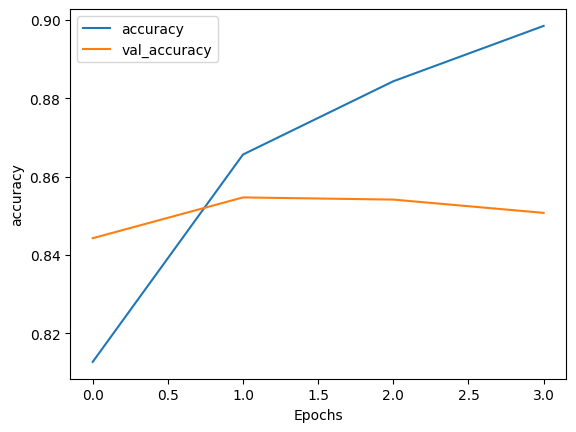

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()
plot_graphs(history, 'accuracy')

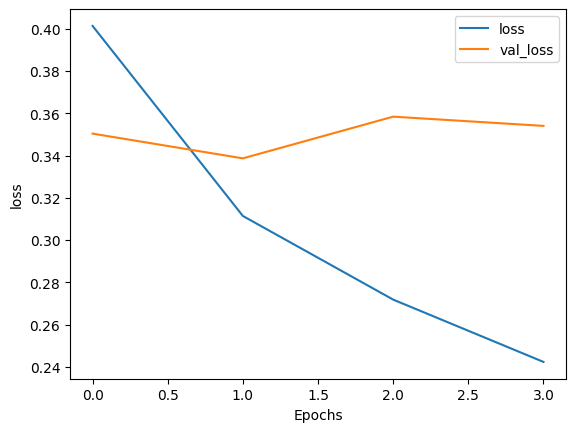

In [ ]:
plot_graphs(history, 'loss')

In [ ]:
# 테스트 데이터 불러오기
test_file = tf.keras.utils.get_file(
    'ratings_test.txt', origin='https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt', extract=True)

test = pd.read_csv(test_file, sep='\t')
test.head()

4893335/4893335 [==============================] - 0s 0us/step


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
# 데이터 전처리
def preprocessing(df):
  df['document'] = df['document'].str.replace("[^A-Za-z가-힣ㄱ-ㅎㅏ-ㅣ ]","")
  df = df.dropna()
  test_label = np.asarray(df['label']).reshape(-1,1)
  test_data =  df['document'].apply((lambda x: word_tokenization(x)))
  test_data = tokenizer.texts_to_sequences(test_data)
  test_data = pad_sequences(test_data, truncating=trunc_type, padding=padding_type, maxlen=max_length)
  return test_data, test_label

test_data, test_label = preprocessing(test)
print(model.evaluate(test_data, test_label))
     

1563/1563 [==============================] - 27s 17ms/step - loss: 0.3614 - accuracy: 0.8468
[0.3613837957382202, 0.8468292355537415]


In [ ]:
# 기본 모델 로드 후 평가
model2 = create_model()
model2.evaluate(test_data, test_label)

1563/1563 [==============================] - 30s 17ms/step - loss: 0.6931 - accuracy: 0.5035


[0.6931382417678833, 0.5034968256950378]

In [ ]:
# 저장된 가중치 적용된 모델 로드 후 평가
model2.load_weights(checkpoint_path)
model2.evaluate(test_data, test_label)

1563/1563 [==============================] - 29s 18ms/step - loss: 0.3467 - accuracy: 0.8520


[0.34666338562965393, 0.8519866466522217]

#예측하기

In [ ]:
 import pickle
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import re
 import urllib.request
 from konlpy.tag import Okt
 from tqdm import tqdm
 from tensorflow.keras.preprocessing.text import Tokenizer
 from tensorflow.keras.preprocessing.sequence import pad_sequences

 #vocab_size 설정
 tokenizer = Tokenizer()

In [ ]:
okt=Okt() ##Open Korean Text 트위터에서 만든 형태소 분석기
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔',stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [ ]:
new_sentence = '와 개쩐다 정말 세계관 최강자들의 영화다'
new_sentence = re.sub(r'[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]','',new_sentence)
new_sentence
##문자열 치환 re.sub(검색패턴, 변경하고 싶은 문자, 검색되는 문자열) 

'와 개쩐다 정말 세계관 최강자들의 영화다'

In [ ]:
new_sentence = okt.morphs(new_sentence, stem=True)
new_sentence

['오다', '개', '쩐다', '정말', '세계관', '최강', '자', '들', '의', '영화', '다']

In [ ]:
stop_words = ["는", "을", "를", '이', '가', '의', '던', '고', '하', '다', '은', '에', '들', '지', '게', '도']

In [ ]:
new_sentence = [word for word in new_sentence if not word in stop_words]
new_sentence

['오다', '개', '쩐다', '정말', '세계관', '최강', '자', '영화']

In [ ]:
oov_tok = ""#사전에 없는 단어
vocab_size = 15000

tokenizer = Tokenizer(oov_token=oov_tok, num_words=vocab_size)
tokenizer.fit_on_texts(new_sentence)

In [ ]:
encoded = tokenizer.texts_to_sequences(new_sentence)
encoded

[[2], [3], [4], [5], [6], [7], [8], [9]]

In [ ]:
pad_new=pad_sequences(encoded, maxlen=max_length)
pad_new.shape

(8, 74)

In [ ]:
model2.predict(pad_new).shape

1/1 [==============================] - 0s 37ms/step


(8, 74, 1)

In [ ]:
model2.predict(pad_new)

In [ ]:
score=np.max(model2.predict(pad_new))
print(score)

1/1 [==============================] - 0s 31ms/step
0.51988983


In [ ]:
max_len = 74
stop_words = ["는", "을", "를", '이', '가', '의', '던', '고', '하', '다', '은', '에', '들', '지', '게', '도']

def sentiment_predict(new_sentence):
  new_sentence = new_sentence.replace("[^A-Za-z-가-힣ㄱ-ㅎㅏ-ㅣ ]","")
  new_sentence = okt.morphs(new_sentence, stem=True) #토큰화
  new_sentence = [word for word in new_sentence if not word in stop_words] #불용어 제거
  encoded = tokenizer.texts_to_sequences(new_sentence) #정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) #패딩
  score = np.max(model2.predict(pad_new)) #예측
  if score > 0.5 :
    print("{:.2f}% 확률로 긍정 리뷰 입니다.\n".format(score*100))
  else:
    print("{:.2f}% 확률로 부정 리뷰 입니다.\n".format(score*100))

In [ ]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ~~!!')

1/1 [==============================] - 0s 40ms/step
43.52% 확률로 부정 리뷰 입니다.



In [ ]:
sentiment_predict('이딴게 영화냐 ㅉㅉ')

1/1 [==============================] - 0s 29ms/step
43.52% 확률로 부정 리뷰 입니다.



In [ ]:
sentiment_predict('와 개쩐다 정말 세계관 최강자들의 영화다')

1/1 [==============================] - 0s 32ms/step
51.99% 확률로 긍정 리뷰 입니다.



In [ ]:
sentiment_predict('감독 뭐하는 놈이냐?')

1/1 [==============================] - 0s 34ms/step
43.28% 확률로 부정 리뷰 입니다.

